# Regularization L1, L2, Batch Normalization and Ghost Batch Normalization

In this experiment we are going to examine the various regularization techniques and their effect on the Neural Networks, we are also going to compare all of the exeriment's result. The dataset used is MNIST hand written digits.

In [1]:
# Import all necessary libraries

from __future__ import print_function

import lib.model as m         # model class to create CNNs of 8->8->16->pool->16->16->16->gap architecture
import lib.preprocess as pp   # library file that takes care of loading, visualizing, transforming and creating data loaders
import lib.misc as misc       # utility functions for custom graphs and functions

### Load the dataset

In [2]:
data = pp.load_data("MNIST")

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


### Visualize a sample set and calculate mean and std for Image Normalization (transform)

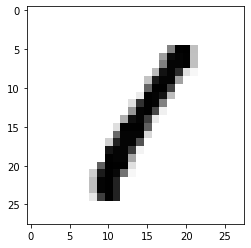

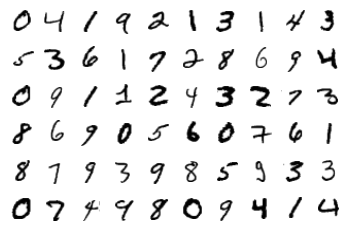

In [3]:
mean, std = pp.peek(data)

### Transform with Image Normalization, Augmentation and create dataloaders

In [4]:
train_loader, test_loader = pp.transform_load(data, mean, std, batch_size=64)

CUDA Available? True


In [5]:
# Define dictionary for the experiments

a = {
    "L1 + BN" : ["BN", 0.001, 0],
    "L2 + BN" : ["BN", 0, 0.0001],
    "L1 + L2 + BN" : ["BN", 0.001, 0.0001],
    "GBN" : ["GBN", 0, 0],
    "L1 + L2 + GBN" : ["GBN", 0.001, 0.0001]
}

### Run all the experiments

In [6]:
results = {}

for i in a.items():
    
    print(i[1][0], "L1", i[1][1], "L2", i[1][2])
    
    if i[1][0] == "GBN": train_loader, test_loader = pp.transform_load(data, mean, std, batch_size=16)
    
    res = misc.model_start(train_loader, test_loader, i[1][0], i[1][1], i[1][2], 0.01, 20)
    
    results[i[0]] = res

BN L1 0.001 L2 0


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0916, Accuracy: 9765/10000 (97.65%)

Epoch 2:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0945, Accuracy: 9773/10000 (97.73%)

Epoch 3:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0755, Accuracy: 9794/10000 (97.94%)

Epoch 4:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0743, Accuracy: 9782/10000 (97.82%)

Epoch 5:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0864, Accuracy: 9788/10000 (97.88%)

Epoch 6:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0303, Accuracy: 9917/10000 (99.17%)

Epoch 7:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0296, Accuracy: 9916/10000 (99.16%)

Epoch 8:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0324, Accuracy: 9902/10000 (99.02%)

Epoch 9:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0344, Accuracy: 9917/10000 (99.17%)

Epoch 10:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0359, Accuracy: 9896/10000 (98.96%)

Epoch 11:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0253, Accuracy: 9940/10000 (99.40%)

Epoch 12:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0241, Accuracy: 9943/10000 (99.43%)

Epoch 13:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0247, Accuracy: 9935/10000 (99.35%)

Epoch 14:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0246, Accuracy: 9935/10000 (99.35%)

Epoch 15:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0244, Accuracy: 9934/10000 (99.34%)

Epoch 16:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0239, Accuracy: 9941/10000 (99.41%)

Epoch 17:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0239, Accuracy: 9935/10000 (99.35%)

Epoch 18:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0240, Accuracy: 9934/10000 (99.34%)

Epoch 19:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0244, Accuracy: 9932/10000 (99.32%)

Epoch 20:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0239, Accuracy: 9935/10000 (99.35%)

BN L1 0 L2 0.0001
Epoch 1:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0789, Accuracy: 9835/10000 (98.35%)

Epoch 2:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0544, Accuracy: 9865/10000 (98.65%)

Epoch 3:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0368, Accuracy: 9905/10000 (99.05%)

Epoch 4:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0341, Accuracy: 9905/10000 (99.05%)

Epoch 5:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0296, Accuracy: 9913/10000 (99.13%)

Epoch 6:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0227, Accuracy: 9946/10000 (99.46%)

Epoch 7:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0218, Accuracy: 9950/10000 (99.50%)

Epoch 8:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0218, Accuracy: 9947/10000 (99.47%)

Epoch 9:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0223, Accuracy: 9949/10000 (99.49%)

Epoch 10:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0215, Accuracy: 9946/10000 (99.46%)

Epoch 11:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0213, Accuracy: 9945/10000 (99.45%)

Epoch 12:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0211, Accuracy: 9949/10000 (99.49%)

Epoch 13:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0217, Accuracy: 9944/10000 (99.44%)

Epoch 14:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0210, Accuracy: 9951/10000 (99.51%)

Epoch 15:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0205, Accuracy: 9949/10000 (99.49%)

Epoch 16:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0218, Accuracy: 9944/10000 (99.44%)

Epoch 17:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0206, Accuracy: 9950/10000 (99.50%)

Epoch 18:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0213, Accuracy: 9945/10000 (99.45%)

Epoch 19:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0216, Accuracy: 9944/10000 (99.44%)

Epoch 20:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0204, Accuracy: 9951/10000 (99.51%)

BN L1 0.001 L2 0.0001
Epoch 1:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.1284, Accuracy: 9691/10000 (96.91%)

Epoch 2:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0815, Accuracy: 9798/10000 (97.98%)

Epoch 3:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.1089, Accuracy: 9714/10000 (97.14%)

Epoch 4:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0933, Accuracy: 9743/10000 (97.43%)

Epoch 5:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0798, Accuracy: 9783/10000 (97.83%)

Epoch 6:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0308, Accuracy: 9919/10000 (99.19%)

Epoch 7:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0346, Accuracy: 9913/10000 (99.13%)

Epoch 8:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0329, Accuracy: 9911/10000 (99.11%)

Epoch 9:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0368, Accuracy: 9900/10000 (99.00%)

Epoch 10:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0392, Accuracy: 9905/10000 (99.05%)

Epoch 11:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0266, Accuracy: 9929/10000 (99.29%)

Epoch 12:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0268, Accuracy: 9928/10000 (99.28%)

Epoch 13:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0266, Accuracy: 9925/10000 (99.25%)

Epoch 14:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0264, Accuracy: 9931/10000 (99.31%)

Epoch 15:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0273, Accuracy: 9923/10000 (99.23%)

Epoch 16:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0267, Accuracy: 9926/10000 (99.26%)

Epoch 17:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0258, Accuracy: 9928/10000 (99.28%)

Epoch 18:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0258, Accuracy: 9925/10000 (99.25%)

Epoch 19:


  0%|          | 0/938 [00:00<?, ?it/s]


Validation set: Average loss: 0.0262, Accuracy: 9930/10000 (99.30%)

Epoch 20:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0255, Accuracy: 9927/10000 (99.27%)

GBN L1 0 L2 0
CUDA Available? True
Epoch 1:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0495, Accuracy: 9857/10000 (98.57%)

Epoch 2:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0417, Accuracy: 9879/10000 (98.79%)

Epoch 3:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0391, Accuracy: 9876/10000 (98.76%)

Epoch 4:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0333, Accuracy: 9891/10000 (98.91%)

Epoch 5:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0290, Accuracy: 9900/10000 (99.00%)

Epoch 6:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0249, Accuracy: 9918/10000 (99.18%)

Epoch 7:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0233, Accuracy: 9926/10000 (99.26%)

Epoch 8:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0241, Accuracy: 9922/10000 (99.22%)

Epoch 9:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0226, Accuracy: 9935/10000 (99.35%)

Epoch 10:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0242, Accuracy: 9928/10000 (99.28%)

Epoch 11:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0234, Accuracy: 9923/10000 (99.23%)

Epoch 12:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0233, Accuracy: 9930/10000 (99.30%)

Epoch 13:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0231, Accuracy: 9928/10000 (99.28%)

Epoch 14:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0230, Accuracy: 9935/10000 (99.35%)

Epoch 15:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0235, Accuracy: 9933/10000 (99.33%)

Epoch 16:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0235, Accuracy: 9928/10000 (99.28%)

Epoch 17:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0233, Accuracy: 9934/10000 (99.34%)

Epoch 18:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0231, Accuracy: 9932/10000 (99.32%)

Epoch 19:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0221, Accuracy: 9932/10000 (99.32%)

Epoch 20:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0229, Accuracy: 9933/10000 (99.33%)

GBN L1 0.001 L2 0.0001
CUDA Available? True
Epoch 1:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.1105, Accuracy: 9676/10000 (96.76%)

Epoch 2:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.1292, Accuracy: 9611/10000 (96.11%)

Epoch 3:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.1194, Accuracy: 9621/10000 (96.21%)

Epoch 4:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.1093, Accuracy: 9662/10000 (96.62%)

Epoch 5:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0883, Accuracy: 9748/10000 (97.48%)

Epoch 6:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0423, Accuracy: 9874/10000 (98.74%)

Epoch 7:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0425, Accuracy: 9862/10000 (98.62%)

Epoch 8:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0472, Accuracy: 9859/10000 (98.59%)

Epoch 9:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0467, Accuracy: 9844/10000 (98.44%)

Epoch 10:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0442, Accuracy: 9859/10000 (98.59%)

Epoch 11:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0349, Accuracy: 9898/10000 (98.98%)

Epoch 12:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0365, Accuracy: 9891/10000 (98.91%)

Epoch 13:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0345, Accuracy: 9895/10000 (98.95%)

Epoch 14:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0338, Accuracy: 9906/10000 (99.06%)

Epoch 15:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0380, Accuracy: 9888/10000 (98.88%)

Epoch 16:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0330, Accuracy: 9901/10000 (99.01%)

Epoch 17:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0337, Accuracy: 9904/10000 (99.04%)

Epoch 18:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0326, Accuracy: 9906/10000 (99.06%)

Epoch 19:


  0%|          | 0/3750 [00:00<?, ?it/s]


Validation set: Average loss: 0.0319, Accuracy: 9911/10000 (99.11%)

Epoch 20:


Loss=0.45 Batch_ID=3749 Accuracy=96.68: 100%|██████████| 3750/3750 [00:34<00:00, 109.96it/s]



Validation set: Average loss: 0.0334, Accuracy: 9905/10000 (99.05%)



### Plot validation accuracy and Losses for all the experiments

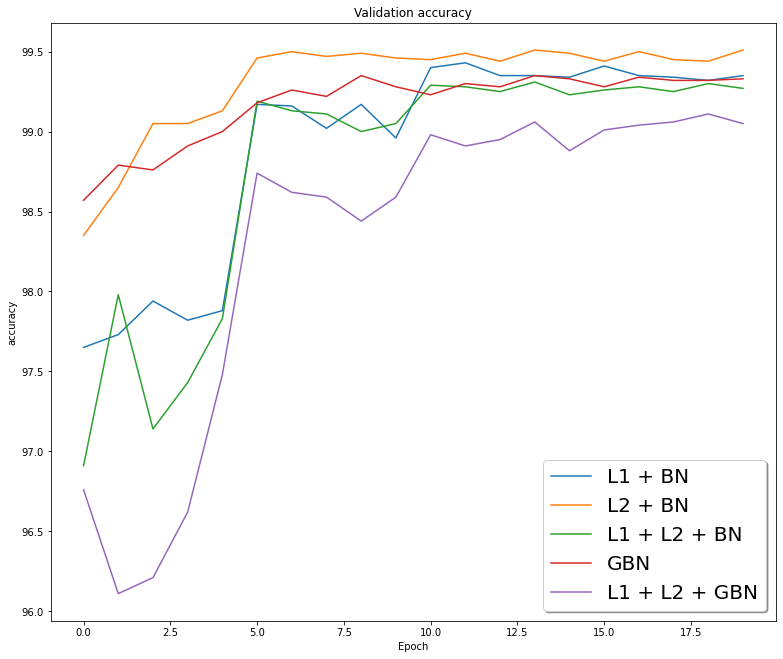

In [7]:
misc.plot(results, "accuracy")

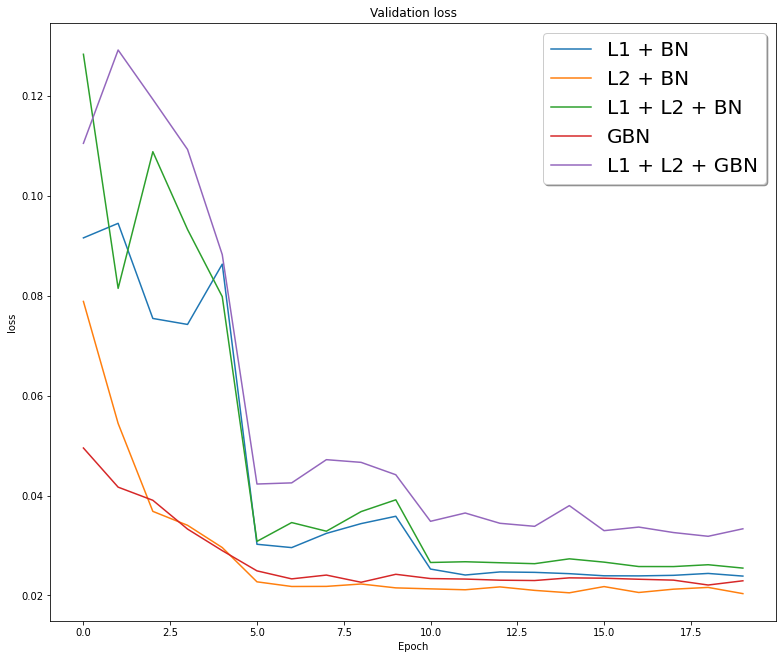

In [8]:
misc.plot(results, "loss")

### Plotting missclassified images for L1 + L2 + BGN

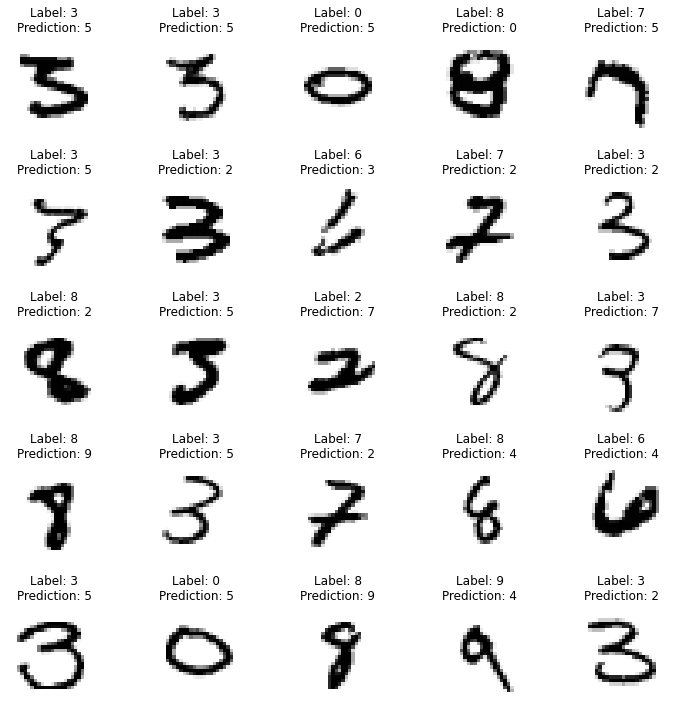

In [9]:
misc.missclassified(results, "L1 + L2 + GBN")